# H1-B Visa Petitions

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

%matplotlib inline

C:\Users\scara\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
path=r"C:\Users\scara\Desktop\Masters\DataScience\FinalProject"

In [3]:
my_df=pd.read_csv(f'{path}\h1bsamp.csv')
print(my_df.shape)
my_df.head(3)

(100605, 11)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158


# Train, Valid and Test Data Split

In [4]:
# Function to split data sets
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

In [5]:
#Calculate
length=len(my_df)
print("Length of Full Data Frame",length)
test = int((30*length)/100)
print("Length of test",test)

Length of Full Data Frame 100605
Length of test 30181


In [6]:
mydf_train,mydf_valid_test = mydf_splitter(my_df,(length-test))
print(mydf_train.shape,mydf_valid_test.shape)

(70424, 11) (30181, 11)


In [7]:
#Verify the train data
mydf_train.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158


In [8]:
#Verify the valid_test data
mydf_valid_test.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
70424,70425,CERTIFIED,GRAND BK CORP,FINANCIAL ANALYSTS,CORPORATE FINANCIAL ANALYST FOR INTERNATIONAL ...,N,65187.2,2016,"MASPETH, NEW YORK",-73.906588,40.729402
70425,70426,CERTIFIED,JPMORGAN CHASE & CO.,FINANCIAL ANALYSTS,ANALYST,Y,72800.0,2016,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
70426,70427,CERTIFIED,CONNECTICUT MUNICIPAL ELECTRIC ENERGY COOPERATIVE,FINANCIAL ANALYSTS,STRATEGIC OPERATIONS PROFESSIONAL APPRENTICESHIP,N,51355.0,2016,"NORWICH, CONNECTICUT",-72.075910,41.524265


In [9]:
# Split the valid_test data in half into validation and test sets
a=int(test/2)
print(a)
mydf_valid,mydf_test = mydf_splitter(mydf_valid_test,a)
print(mydf_valid.shape,mydf_test.shape)

15090
(15090, 11) (15091, 11)


In [10]:
#Verify the valid data
mydf_valid.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
70424,70425,CERTIFIED,GRAND BK CORP,FINANCIAL ANALYSTS,CORPORATE FINANCIAL ANALYST FOR INTERNATIONAL ...,N,65187.2,2016,"MASPETH, NEW YORK",-73.906588,40.729402
70425,70426,CERTIFIED,JPMORGAN CHASE & CO.,FINANCIAL ANALYSTS,ANALYST,Y,72800.0,2016,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
70426,70427,CERTIFIED,CONNECTICUT MUNICIPAL ELECTRIC ENERGY COOPERATIVE,FINANCIAL ANALYSTS,STRATEGIC OPERATIONS PROFESSIONAL APPRENTICESHIP,N,51355.0,2016,"NORWICH, CONNECTICUT",-72.075910,41.524265


In [11]:
#Verify the test data
mydf_test.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
85514,85515,CERTIFIED,"ANVETA, INC.",COMPUTER SYSTEMS ANALYSTS,SYSTEMS ANALYST,N,60133.0,2016,"IRVING, TEXAS",-96.948894,32.814018
85515,85516,CERTIFIED,ERNST & YOUNG U.S. LLP,COMPUTER SYSTEMS ANALYSTS,ADVISORY STAFF,Y,74922.0,2016,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
85516,85517,CERTIFIED,QUICKEN LOANS INC.,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST IN BUSINESS INTELLIGENCE,Y,78250.0,2016,"DETROIT, MICHIGAN",-83.045754,42.331427


In [12]:
'''Writing out test data for performance evaluation'''
mydf_test.to_csv(r"C:\Users\scara\Desktop\Masters\DataScience\FinalProject\H1b_test.csv",index = False)

# # Data Pre-Processing

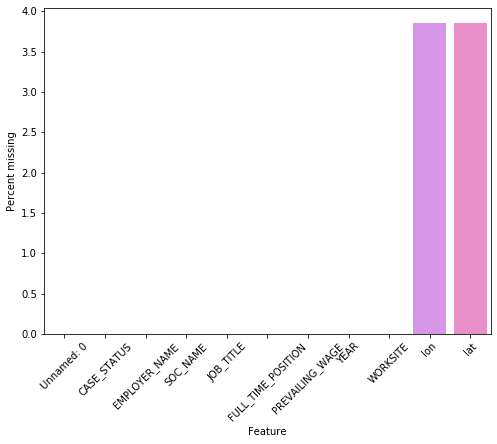

In [13]:
#Finding miising values
null_vals = mydf_train.isnull().sum()/len(mydf_train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [14]:
mydf_train.info()
mydf_train_1 = mydf_train.drop(["lon","lat"],axis = 1)
print(mydf_train_1.shape)
mydf_train_1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70424 entries, 0 to 70423
Data columns (total 11 columns):
Unnamed: 0            70424 non-null int64
CASE_STATUS           70424 non-null object
EMPLOYER_NAME         70423 non-null object
SOC_NAME              70423 non-null object
JOB_TITLE             70424 non-null object
FULL_TIME_POSITION    70424 non-null object
PREVAILING_WAGE       70424 non-null float64
YEAR                  70424 non-null int64
WORKSITE              70424 non-null object
lon                   67713 non-null float64
lat                   67713 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 5.9+ MB
(70424, 9)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS"


In [15]:
'''Converting object and String types to Category types'''
def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [16]:
# Apply the str_to_cat function
mydf_train_2 = str_to_cat(mydf_train_1)
mydf_train_2.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS"


In [17]:
mydf_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70424 entries, 0 to 70423
Data columns (total 9 columns):
Unnamed: 0            70424 non-null int64
CASE_STATUS           70424 non-null category
EMPLOYER_NAME         70423 non-null category
SOC_NAME              70423 non-null category
JOB_TITLE             70424 non-null category
FULL_TIME_POSITION    70424 non-null category
PREVAILING_WAGE       70424 non-null float64
YEAR                  70424 non-null int64
WORKSITE              70424 non-null category
dtypes: category(6), float64(1), int64(2)
memory usage: 4.1 MB


In [18]:
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [19]:
mydf_train_3,my_table = mydf_preprocessor(mydf_train_2,null_table = None)

In [20]:
#Check dataframe
mydf_train_3.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,2,23100,13,12405,1,36067.0,2016,79
1,2,2,9182,19,3154,2,242674.0,2016,2545


In [21]:
my_table

{}

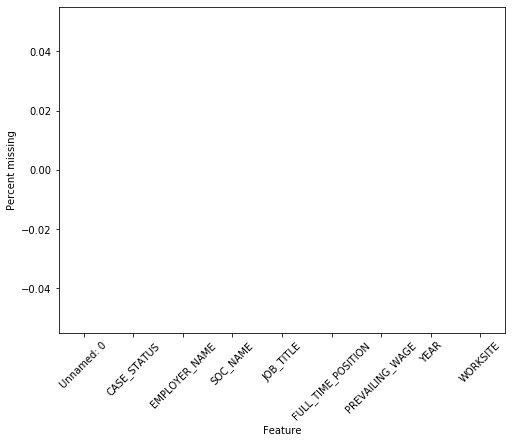

In [22]:
#Finding miising values
null_vals = mydf_train_1.isnull().sum()/len(mydf_train_1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [23]:
Y_train = mydf_train_2["CASE_STATUS"]
X_train = mydf_train_2.drop(["CASE_STATUS"],axis = 1)

print(X_train.shape,Y_train.shape)

(70424, 8) (70424,)


In [24]:
#Fitting the model
scaler = preprocessing.StandardScaler().fit(X_train[["PREVAILING_WAGE"]])
X_train[["PREVAILING_WAGE"]] = pd.DataFrame(scaler.transform(X_train[["PREVAILING_WAGE"]]))
X_train.head(2)

,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,23100,13,12405,1,-0.030679,2016,79
1,2,9182,19,3154,2,0.068753,2016,2545


In [25]:
'''Store the scaler as a joblib file'''
!mkdir scaler_trainset
scaler_name = r'C:\Users\scara\Desktop\Masters\DataScience\FinalProject\scaler_trainset\scaler_train.sav'
joblib.dump(scaler,scaler_name)

['C:\\Users\\scara\\Desktop\\Masters\\DataScience\\FinalProject\\scaler_trainset\\scaler_train.sav']

In [26]:
'''Preprocess the validation set'''
mydf_valid_1 = mydf_valid.drop(["lon","lat"],axis = 1)

In [27]:
#Check valid data
mydf_valid_1.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
70424,70425,CERTIFIED,GRAND BK CORP,FINANCIAL ANALYSTS,CORPORATE FINANCIAL ANALYST FOR INTERNATIONAL ...,N,65187.2,2016,"MASPETH, NEW YORK"
70425,70426,CERTIFIED,JPMORGAN CHASE & CO.,FINANCIAL ANALYSTS,ANALYST,Y,72800.0,2016,"SAN FRANCISCO, CALIFORNIA"


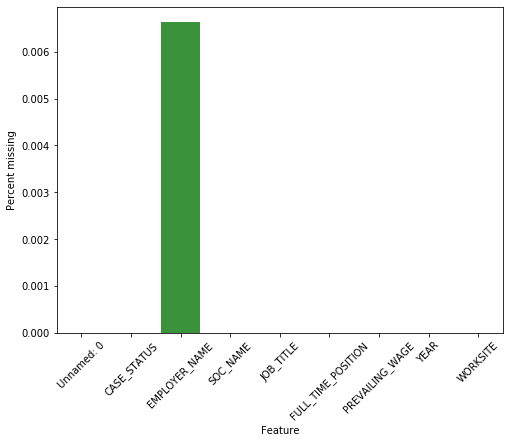

In [28]:
#Finding missing values
null_vals = mydf_valid_1.isnull().sum()/len(mydf_valid_1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [29]:
'''(3) Map categories to numbers for validation set'''
mydf_valid_2 = str_to_cat(mydf_valid_1)

In [30]:
mydf_valid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 70424 to 85513
Data columns (total 9 columns):
Unnamed: 0            15090 non-null int64
CASE_STATUS           15090 non-null category
EMPLOYER_NAME         15089 non-null category
SOC_NAME              15090 non-null category
JOB_TITLE             15090 non-null category
FULL_TIME_POSITION    15090 non-null category
PREVAILING_WAGE       15090 non-null float64
YEAR                  15090 non-null int64
WORKSITE              15090 non-null category
dtypes: category(6), float64(1), int64(2)
memory usage: 933.5 KB


In [31]:
#Make sure category mapping are consistent across the two data sets
print(mydf_valid_2.CASE_STATUS.cat.categories)

Index(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'], dtype='object')


In [32]:
mydf_valid_3,my_table1 = mydf_preprocessor(mydf_valid_2,
                                         null_table = my_table)
print(mydf_valid_3.shape)
mydf_valid_3.head(3)

(15090, 9)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
70424,70425,1,1899,39,1095,1,65187.2,2016,669
70425,70426,1,2369,39,89,2,72800.0,2016,1014
70426,70427,1,1076,39,3998,1,51355.0,2016,826


In [33]:
#Check dataframe
mydf_train_3.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,2,23100,13,12405,1,36067.0,2016,79
1,2,2,9182,19,3154,2,242674.0,2016,2545


In [34]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

In [35]:
#Tuning hyperparameters
param_grid={
    'n_neighbors':[7],
    'weights':['uniform'],
    'metric':['euclidean']
}

In [36]:
gs=GridSearchCV(KNeighborsClassifier(),param_grid,verbose=1,cv=3,n_jobs=-1)

In [37]:
'''(5) Separate out the X and Y for validation before proceeding'''

Y_valid = mydf_train_3["CASE_STATUS"]
X_valid = mydf_train_3.drop(["CASE_STATUS"],axis = 1)

print(X_valid.shape,Y_valid.shape)

(70424, 8) (70424,)


In [38]:
#Fitting the KNN model:
my_knn_model=GridSearchCV(KNeighborsClassifier(),param_grid,verbose=1,cv=3,n_jobs=-1)
my_knn_results=my_knn_model.fit(X_train,Y_train)
Y_test_pred = my_knn_results.predict(X_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.4s finished


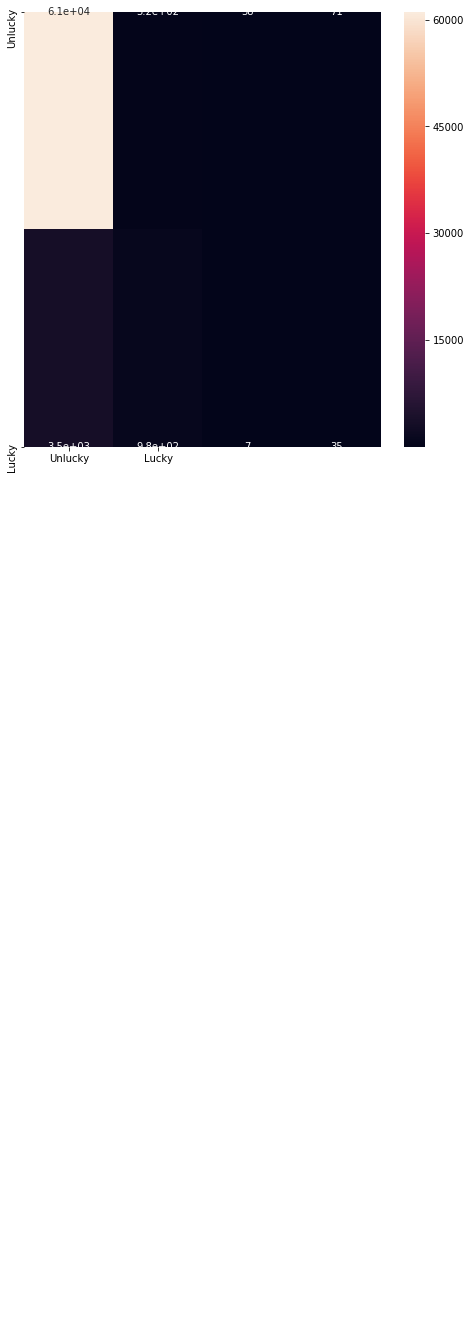

In [39]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_train,Y_test_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Unlucky","Lucky"],
            yticklabels = ["Unlucky","Lucky"],annot = True)

In [40]:
#Printing the metrics
print("Accuracy : ",accuracy_score(Y_train,Y_test_pred))    

Accuracy :  0.8851953879359309


In [41]:
print("Mathews Score : ",matthews_corrcoef(Y_train,Y_test_pred))

Mathews Score :  0.30873766433576333


In [42]:
print("F1 Score : ",f1_score(Y_train,Y_test_pred,pos_label='positive',
                                           average='micro'))

F1 Score :  0.8851953879359309


C:\Users\scara\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Combining the train and validation datasets

In [43]:
X_train_full = pd.concat([X_train,X_valid],ignore_index = True)
print(X_valid.shape)
print(X_train.shape)
print(X_train_full.shape)
X_train_full.head(2)

(70424, 8)
(70424, 8)
(140848, 8)


,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,23100,13,12405,1,-0.030679,2016,79
1,2,9182,19,3154,2,0.068753,2016,2545


In [44]:
# Do the same for Y
Y_train_full = pd.concat([Y_train,Y_valid],ignore_index = True)
print(Y_train_full.shape)

(140848,)


# Building and Saving the trained model

In [45]:
knn_model_fin = KNeighborsClassifier(n_neighbors = 2,weights = 'uniform')
knn_model_fin.fit(X_train_full,Y_train_full)

!mkdir knn_model
knn_model_name = f'{path}\knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

['C:\\Users\\scara\\Desktop\\Masters\\DataScience\\FinalProject\\knn_model_final.sav']

In [46]:
mydf_test = pd.read_csv(f'{path}/H1b_test.csv')
print(mydf_test.shape)
mydf_test.head(3)

(15091, 11)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,85515,CERTIFIED,"ANVETA, INC.",COMPUTER SYSTEMS ANALYSTS,SYSTEMS ANALYST,N,60133.0,2016,"IRVING, TEXAS",-96.948894,32.814018
1,85516,CERTIFIED,ERNST & YOUNG U.S. LLP,COMPUTER SYSTEMS ANALYSTS,ADVISORY STAFF,Y,74922.0,2016,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,85517,CERTIFIED,QUICKEN LOANS INC.,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST IN BUSINESS INTELLIGENCE,Y,78250.0,2016,"DETROIT, MICHIGAN",-83.045754,42.331427


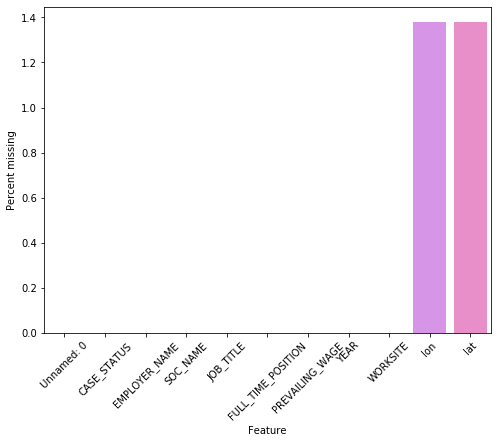

In [47]:
''' (1) Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = mydf_test.isnull().sum()/len(mydf_test)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [48]:
'''Droping unnecessary column'''
mydf_test_1 = mydf_test.drop(["lon","lat"],axis = 1)
print(mydf_test_1.shape)
mydf_test_1.head(2)

(15091, 9)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,85515,CERTIFIED,"ANVETA, INC.",COMPUTER SYSTEMS ANALYSTS,SYSTEMS ANALYST,N,60133.0,2016,"IRVING, TEXAS"
1,85516,CERTIFIED,ERNST & YOUNG U.S. LLP,COMPUTER SYSTEMS ANALYSTS,ADVISORY STAFF,Y,74922.0,2016,"SAN FRANCISCO, CALIFORNIA"


In [49]:
'''(3) Map categories to numbers for test set'''
mydf_test_2 = str_to_cat(mydf_test_1)

In [50]:
my_table

{}

In [51]:
''' (4) Let's proceed with the imputation and convert strings into 
numbers for the test set. Use my_table from training set.'''

my_table = {}
mydf_test_3,my_table1 = mydf_preprocessor(mydf_test_2,
                                         null_table = my_table)
print(mydf_test_3.shape)
mydf_test_3.head(3)

(15091, 9)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,85515,1,193,5,2047,1,60133.0,2016,482
1,85516,1,838,5,34,2,74922.0,2016,946
2,85517,1,1882,5,1459,2,78250.0,2016,256


In [52]:
'''Now, let's separate the X and Y variables (vertical split of the 
dataframe). Here the Y column is the variable we are trying to predict, 
survived or not(0 = No, 1 = Yes)'''
Y_test = mydf_test_3["CASE_STATUS"]
X_test = mydf_test_3.drop(["CASE_STATUS"],axis = 1)
print(X_test.shape,Y_test.shape,mydf_test_3.shape)

(15091, 8) (15091,) (15091, 9)


In [53]:
'''Standardize the continuous variables. Read in the joblib
scaler from the previous notebook'''
scaler_loaded = joblib.load(f'{path}\scaler_trainset\scaler_train.sav')
X_test[["PREVAILING_WAGE"]] = pd.DataFrame(scaler_loaded.transform(X_test[["PREVAILING_WAGE"]]))
X_test.head(2)

,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,85515,193,5,2047,1,-0.019097,2016,482
1,85516,838,5,34,2,-0.011980,2016,946


In [54]:
#Let's load the saved k-NN model and test it out.
kNN_loaded = joblib.load(f'{path}/knn_model_final.sav')
Y_test_pred = kNN_loaded.predict(X_test)
print("Accuracy Score : ",accuracy_score(Y_test,Y_test_pred))

Accuracy Score :  0.9074945331654629


In [55]:
print("Mathews Score : ",matthews_corrcoef(Y_test,Y_test_pred))

Mathews Score :  0.0


C:\Users\scara\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [56]:
print("F1 Score : ",f1_score(Y_test,Y_test_pred,pos_label='positive',
                                           average='micro'))

F1 Score :  0.9074945331654629


C:\Users\scara\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
